# Assignment on Measures of Central Tendency and Dispersion

An Institution wishes to find out their student’s ability in mathematics, reading 
and writing skills. The Institution wants to do an exploratory study to check the
following information.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data =pd.read_csv(r'C:\Users\sruth\OneDrive\Desktop\StudentsPerformance (1).csv')

In [49]:
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [50]:
data.shape

(1000, 8)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [52]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [53]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     85
reading score                  72
writing score                  77
dtype: int64

1. Find out how many males and females participated in the test.


In [54]:
n_males = data[data["gender"] == "male"].shape[0]
n_females = data[data["gender"] == "female"].shape[0]
print("Number of males:", n_males)
print("Number of females:", n_females)

Number of males: 482
Number of females: 518


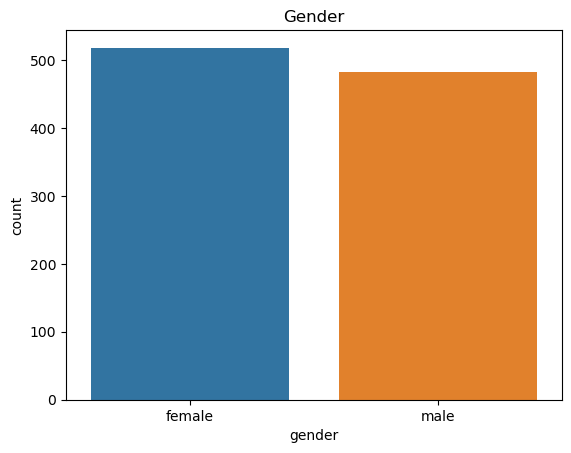

In [55]:
sns.countplot(x=data.gender) 
plt.title("Gender")
plt.show()

The sample consists of 482 male and 518 females.More number of females than male

2. What do you think about the students' parental level of education?

In [22]:
parental_edu_counts = data["parental level of education"].value_counts()
print("Parental education distribution:\n", parental_edu_counts)

Parental education distribution:
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


more number of parents hold college degree, but only 59 parents hold masters degree

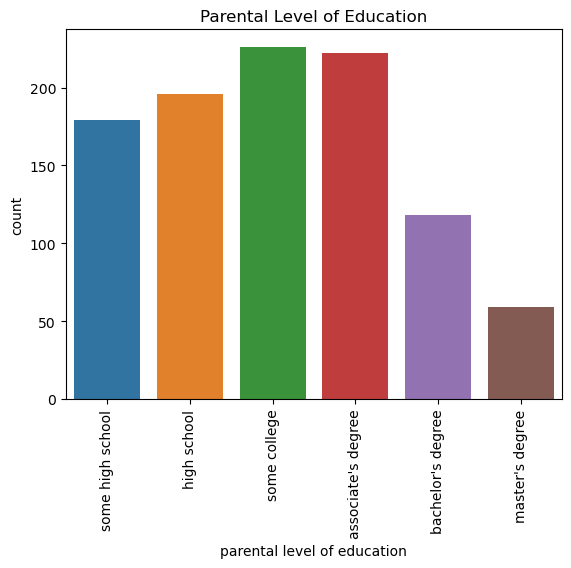

In [56]:
sns.countplot(x="parental level of education", data=data)
plt.xticks(rotation = 90) 
plt.title("Parental Level of Education")
plt.show()

3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [57]:
grouped_data = data.groupby(["gender", "test preparation course"]).mean()
print("Average scores by gender and test preparation course:\n", grouped_data)

Average scores by gender and test preparation course:
                                 math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948


from this table we can see that,  in the case of math score males have high average score than females
In the case of reading score female students got high average score than male students.
In the case of writing  score female students got high average score than male students.
when we consider the test preparation course those who completed the course got more score.

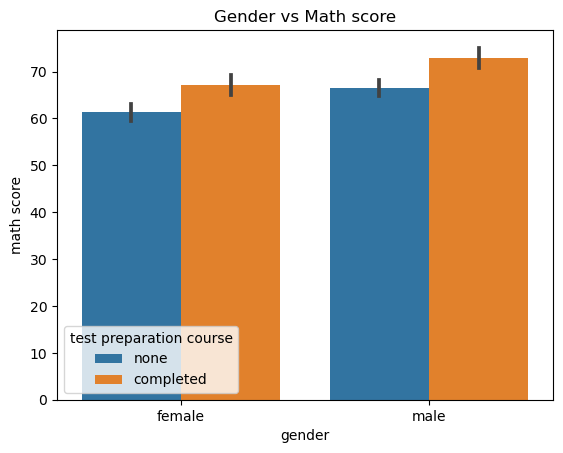

In [37]:
sns.barplot(x='gender', y='math score', hue='test preparation course', data=data)
plt.title('Gender vs Math score')
plt.show()

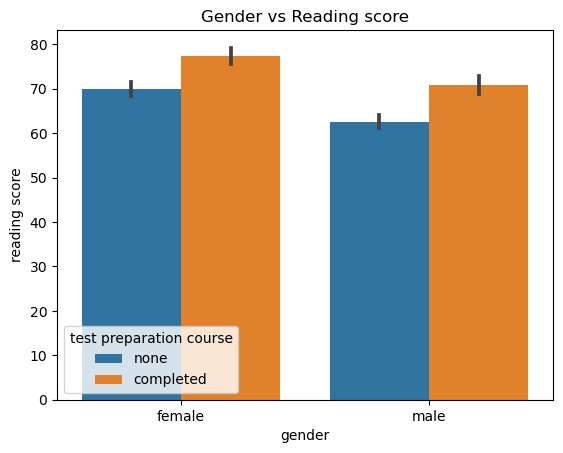

In [38]:
sns.barplot(x='gender', y='reading score', hue='test preparation course', data=data)
plt.title('Gender vs Reading score')
plt.show()

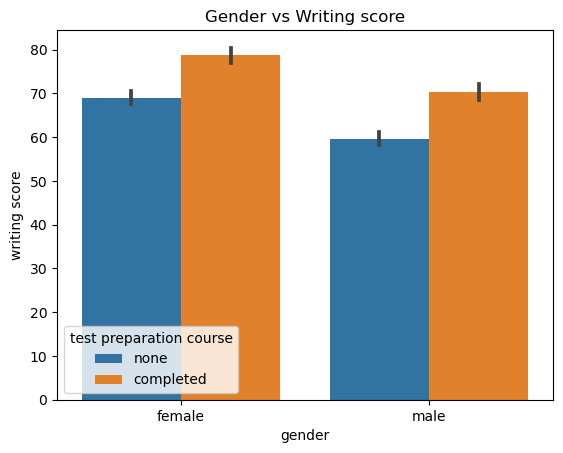

In [39]:
sns.barplot(x='gender', y='writing score', hue='test preparation course', data=data)
plt.title('Gender vs Writing score')
plt.show()

4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

In [10]:
grouped_data1 = data.groupby(["gender", "test preparation course"]).agg([np.var, np.std])
print("Scoring variation by gender and test preparation course:\n", grouped_data1)


Scoring variation by gender and test preparation course:
                                 math score            reading score  \
                                       var        std           var   
gender test preparation course                                        
female completed                208.173913  14.428233    161.175546   
       none                     272.602767  16.510686    214.241220   
male   completed                197.098133  14.039164    185.297987   
       none                     205.513600  14.335746    184.843553   

                                          writing score             
                                      std           var        std  
gender test preparation course                                      
female completed                12.695493    149.836897  12.240788  
       none                     14.636981    225.495172  15.016497  
male   completed                13.612420    166.098233  12.887910  
       none                   

C:\Users\sruth\AppData\Local\Temp\ipykernel_2628\419411206.py:1: FutureWarning: ['race/ethnicity', 'parental level of education', 'lunch'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_data1 = data.groupby(["gender", "test preparation course"]).agg([np.var, np.std])


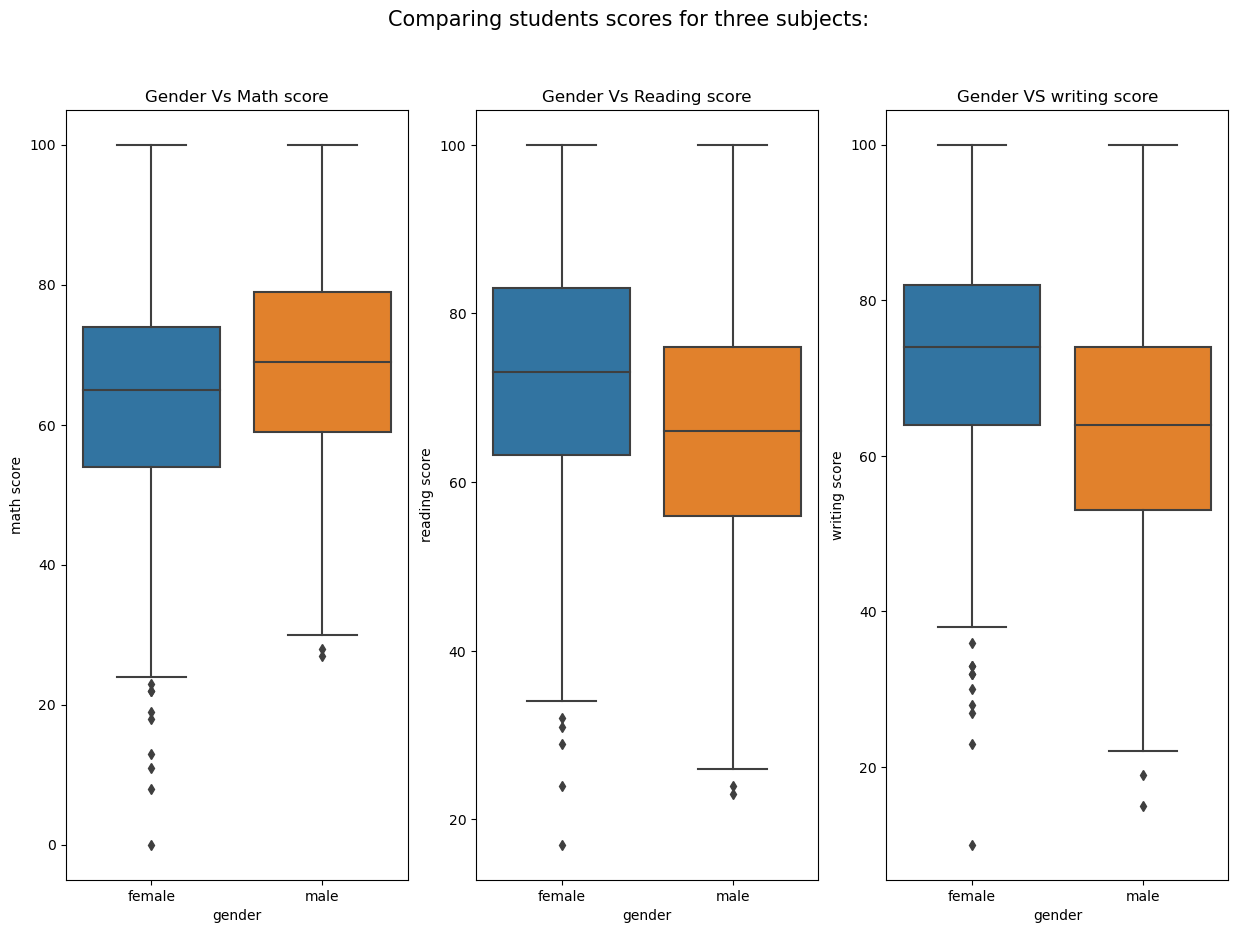

In [45]:

fig, (A, B, C) = plt.subplots(1, 3, figsize=(15, 10))
fig.suptitle('Comparing students scores for three subjects:', fontsize=15)

# Math score
sns.boxplot(x='gender', y='math score', data=data, ax=A)
A.set_title('Gender Vs Math score')

# Reading Score
sns.boxplot(x='gender', y='reading score', data=data, ax=B)
B.set_title('Gender Vs Reading score')

# Writing Score
sns.boxplot(x='gender', y='writing score', data=data, ax=C)
C.set_title('Gender VS writing score')

plt.show()

Variances are high in females.
Outliers are more in females than males.


5. The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this.
Please note the following:
Dataset is added along with
Do the assignment in Jupyter notebook/cola

In [46]:
bonus_limit= data["math score"].quantile(0.75)
bonus_students = data[data["math score"] >= bonus_limit]
print("Bonus students:\n", bonus_students)

Bonus students:
      gender race/ethnicity parental level of education         lunch  \
414  female        group A                 high school  free/reduced   
415  female        group B             master's degree  free/reduced   
416  female        group B           bachelor's degree  free/reduced   
417  female        group B             master's degree      standard   
418  female        group B                 high school      standard   
..      ...            ...                         ...           ...   
995    male        group E                some college      standard   
996    male        group A                some college      standard   
997    male        group D                some college      standard   
998    male        group E          associate's degree  free/reduced   
999    male        group E           bachelor's degree      standard   

    test preparation course  math score  reading score  writing score  
414               completed          77       